#Introduction to scikit-learn(sklearn)

this notebook demonstrate some of the most useful functions of the beautiful sk-learn libary

what we are going to cover

0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right Estimator /algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improve the model
6. save and load a trained model
7. Putting it all together

# 0.  end to end sckit-learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#create x (features matrix)
x = heart_disease.drop("target", axis=1)

#create y (labels)
y = heart_disease["target"]

In [4]:
#2.choose the right model and hyparameters
from sklearn.ensemble import RandomForestClassifier 
#learning patterns and data and classifying if a row is one thing or another

#classifier sk-learn
clf  = RandomForestClassifier(n_estimators=100)

#we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3.  fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#split data into test and train 80% train 20% for train

In [6]:
#classification data find the model randomforest find the patterns in the training data
clf.fit(x_train, y_train);


In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3


In [8]:
#make a prediciton 
y_label = clf.predict(np.array([0, 2, 3, 4]))
#shapeisnt correct

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [10]:
y_test

233    0
115    1
293    0
27     1
118    1
      ..
31     1
205    0
207    0
237    0
68     1
Name: target, Length: 61, dtype: int64

In [11]:
#Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [12]:
clf.score(x_test, y_test)

0.8032786885245902

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[21,  9],
       [ 3, 28]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [16]:
#improve a model
#try different amount of n_estimator
np.random.seed(42)
for i in range(10, 100, 10):
    print("Trying models with", {i}, "estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test)* 100:.2f}%", )
    print("")

Trying models with {10} estimators...
Model accuracy on test set: 78.69%

Trying models with {20} estimators...
Model accuracy on test set: 77.05%

Trying models with {30} estimators...
Model accuracy on test set: 83.61%

Trying models with {40} estimators...
Model accuracy on test set: 80.33%

Trying models with {50} estimators...
Model accuracy on test set: 78.69%

Trying models with {60} estimators...
Model accuracy on test set: 80.33%

Trying models with {70} estimators...
Model accuracy on test set: 78.69%

Trying models with {80} estimators...
Model accuracy on test set: 78.69%

Trying models with {90} estimators...
Model accuracy on test set: 80.33%



In [17]:
#6 save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8032786885245902

#optional debugging warning in jupyter
#import warnings 
#warnings.filterwarningsf("ignore")

In [19]:
#import sklearn version
import sklearn
sklearn.show_versions()


System:
    python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
executable: c:\Users\JOHNKENNEDY\Anaconda3\python.exe
   machine: Windows-10-10.0.19044-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 0.24.2
        numpy: 1.20.3
        scipy: 1.7.1
       Cython: 0.29.24
       pandas: 1.3.4
   matplotlib: 3.4.3
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


### 1. getting out data ready to be used with machine learning

three main things we have to do:
    1. split the data into features and lables (usually "x" & "y")
    2. filling (also called imputing) or disregarding missing values 
    3. converting non numerical values to numerical values (also called feature encoding)
                

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y= heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2)


In [24]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((242, 13), (61, 13), (61,), (242,))

In [25]:
x.shape[0] *  0.8

242.4

In [26]:
242 + 61

303

In [27]:
len(heart_disease)

303

In [28]:
#clean data transform data reduce data
# 1.1 Make sure its all numerical
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
#split the data into x y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#split into train and test
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2)


In [32]:
#build machine learning model
from sklearn.ensemble import RandomForestRegressor
#pediciting numbers

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)
#couldnt build the model cause it wasnt converted to numbers

ValueError: could not convert string to float: 'Toyota'

In [37]:
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorial_features =  ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                categorial_features)],
                              remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [38]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [39]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [40]:
#second way of changing all to numerical
dummies =pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [41]:
#lets refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y,
                                                   test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
model.score(x_test, y_test)

0.3235867221569877

##1.2 what if ther were missing values
1. fill them with some value (also known as imputation).
2. Remove the sample with missing data altogether.


In [43]:
#import car_sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
## staring from here

In [45]:
#create x and y
x= car_sales_missing.drop ("Price", axis=1)
y =car_sales_missing["Price"]

In [46]:
#chcek how many missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
#fill missing data with pandas
#fill the make column
car_sales_missing["Make"].fillna("missing", inplace= True)

#fill the colour column
car_sales_missing["Colour"].fillna("missing", inplace = True)

#fill the odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)

#fill the doors columns
car_sales_missing["Doors"].fillna(4, inplace= True)

In [ ]:
#remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [ ]:
#chcek how many missing values
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
len(car_sales_missing)

950

In [ ]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
#lets convert them to numbers
#catergories

#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorial_features =  ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                categorial_features)],
                              remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [ ]:
#option two fill missing values with sklearn
car_missing_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_missing_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
#drop the rolls with no labels
car_missing_missing.dropna(subset=["Price"], inplace=True)
car_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
#split into x & y
x = car_missing_missing.drop("Price", axis=1)
y = car_missing_missing["Price"]

In [ ]:
#fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill catergorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy= "constant", fill_value= 4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ["Make", "Colour"]
door_feature= ["Doors"]
num_features =["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

#transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [ ]:
car_sales_filled= pd.DataFrame(filled_x,
                              columns= ["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [ ]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorial_features =  ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                categorial_features)],
                              remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

#now we have got our data as numbers and filled (no missing values)
#lets fit our model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,y ,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

##choosing the right estimator / algorithm for our problem
sklearn uses estimator as another term for machine learning model or algorithm


classification - prediciting whether a sample is one thing or another

regression- predicting a number


step 1- Check the sklearn machine learning map



In [ ]:

### 2.1 picking a machine learning model for a regression model 
 #import Boston housing dataset

from sklearn.datasets import load_boston
boston = load_boston()
boston





{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
boston_df= pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"]= pd.Series(boston["target"])
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:

#how many samples
len(boston_df)

506

In [ ]:
#lets try the ridge regression model
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed (42)

#create the data
x= boston_df.drop("target", axis=1)
y=boston_df["target"]

#split into train and sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

#instantiate ridge model
model=Ridge()
model.fit(x_train, y_train)

#check the score of the Ridge model on test data
model.score(x_test, y_test)

0.6662221670168521

how do we improve this score??

what if Ridge wasnt working

lets refer back to the map

In [ ]:
#lets try the random forest regressor
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#spilt the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instatiate Rando Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

#evaluate the random forest regressor
rf.score(x_test, y_test)

0.8654448653350507

In [ ]:
#check the ridge model aga
model.score(x_test, y_test)

0.6662221670168521

#2.2 choosing an estimator for a classification problem

In [ ]:
heart_disease= pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(heart_disease)

303

#consulting the map and it said to try linearSVC


In [ ]:
#import the linearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed 
np.random.seed(42)

#make the data 
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

#split the data into
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#instantiate linearSVC
clf= LinearSVC()
clf.fit(x_train, y_train)

#evalaute the linearSVC
clf.score(x_test, y_test)

C:\Users\JOHNKENNEDY\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [ ]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
#import the Randomforestclassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed 
np.random.seed(42)

#make the data 
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

#split the data into
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#instantiate Randomforestclassifier
clf= RandomForestClassifier()
clf.fit(x_train, y_train)

#evalaute the Randomforestclassifier
clf.score(x_test, y_test)

0.8524590163934426

#why skip other models
#if you have a structure data use emsemble methods such as random forest 
#why??? cause it will perform pretty well if there are patterns 

#Tidbit
#1 if you have structured data, use ensemble methods
#2 if you have unstructured data, use deep learning or transfer learning

##3. fir the model /algorithm and use it to make prediciton

## 3.1  fitting the model to the data

x= feature ,feature variables,dta
y= labels target,target  variables


In [ ]:
#import the Randomforestclassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed 
np.random.seed(42)

#make the data 
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

#split the data into
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#instantiate Randomforestclassifier
clf= RandomForestClassifier()

#fit the model to the data  (training the machine learning model)
clf.fit(x_train, y_train)

#evalaute the Randomforestclassifier (use the patterns the modelhas learnt)
clf.score(x_test, y_test)

0.8524590163934426

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#make predicitions using machine learning model

# 2 ways to make predicitions
#1. predict()
#2 predict_proba()

In [ ]:
#use a trained model to make predicitons
clf.predict(np.array([1, 7, 8, 9]))
#this doesnt work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#if you want to make predicitions it must bbe in the same shape as of whta its been trained with
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
#compare predicitions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds== y_test)
#np.mean(x_test == y_test)

#y_preds=x_test

#why is == ground truth

0.8524590163934426

In [ ]:
clf.score(x_test,y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [ ]:
# make predictions with predict-proba()
#predicit_proba( returns probabilities  of a classification label)
#video 22
clf.predict_proba(x_test[:5])

#the greatest number in the row
#and that greates number is the accuracy prediction of the label where the maximum is one(1)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
#lets predict() on the same data
clf.predict(x_test[:5])
#force the label to give us one label

array([0, 1, 1, 0, 1], dtype=int64)

In [ ]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

#predict will give a single label
#predict-proba returns the probabilitis of a classification label

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# predict can also be used for regression models

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#spliting into training nd test sets 
x_train, x_test,  y_train, y_test= train_test_split(x, y, test_size= 0.2)


#instantiate the fit model 
model = RandomForestRegressor().fit(x_train, y_train)

#make pedictions
y_preds = model.predict(x_test)

In [ ]:
np.array(y_preds[:10])

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [ ]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [ ]:
#compare the predicitions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)
#2.12 away from the target

2.136382352941176

In [ ]:
## evaluating a machine learning model
## sk learn evaulauting and scoring


#three ways to evaluate sklearn models/estimators
# Estimator score method
#the scoring parameter
# problem-specific mettric functions


In [ ]:
## evaulating with score method

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train, y_train)






RandomForestClassifier()

In [ ]:
clf.score(x_train, y_train)
##returns the mean accuracy on the given test data and labels for classification

1.0

In [ ]:
clf.score(x_test, y_test)

0.8524590163934426

In [ ]:
#lets do the same for regression

# predict can also be used for regression models

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#spliting into training nd test sets 
x_train, x_test,  y_train, y_test= train_test_split(x, y, test_size= 0.2)


#instantiate the fit model 
model = RandomForestRegressor().fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)
## returns the coefficient of determination r^2 of thee predicition

0.8654448653350507

In [ ]:
### evaluating the model using the scoring parameter

from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train, y_train);




In [ ]:
clf.score(x_test, y_test)

0.8524590163934426

In [ ]:
cross_val_score(clf, x, y, cv=10)  ##cv=5

###cross val train five times of a model (5 different splits) 
## returna an array

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [ ]:
np.random.seed(42)

#single training test and split score

clf_single_score =clf.score(x_test, y_test)

## take the men of 5-fold cross-validation score
clf_cross_val_score= np.mean(cross_val_score(clf, x, y, cv=5))

#compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
##scoring paramter set to none by default
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

###classification model evaluation metrics

1 accuracy
2 area under ROC curve
3 confusion matrix
4 classification report

Accuracy


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y, cv=5)

In [ ]:
np.mean(cross_val_score)

0.8248087431693989

In [ ]:
print(f"Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-validated Accuracy: 82.48%


## Area under the receiver operating characteristics curve (AUC/ROC)

*Area under curve
*ROC curve

ROC curve are a comparison of a models true postive rate (tpr) versus a models fase postive rate (fpr)

*True positive = model predicts 1 when truth is 1
*False positive = model predicts 1 when the truth is 0
*True negative= model predicts 0 when truth is 0
*False negative =  model predicts 0 when truth is 1

In [ ]:
## create x_test .... etc
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(x_train, y_train)

#make predicitions with probabiities
y_probs =clf.predict_proba(x_test)

y_probs[:10 ], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [ ]:
y_probs_positive_ = y_probs[:, 1]
y_probs_positive_[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [ ]:
#calculate fpr, tpr and thresholds
fpr, tpr, thresholds= roc_curve(y_test, y_probs_positive_)
##how to calculate roc_curve

#check the false postive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

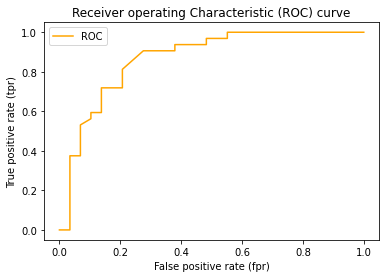

In [ ]:
#create a  function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true postive rate (tpr) of a model.
    """
    #plot roc curve
    plt.plot(fpr, tpr, color= "orange", label='ROC')
    
    #plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color= "darkblue", linestyle="--", label= "Guessing")
    
    #customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
    

plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score (y_test, y_probs_positive_)
# area under the curve max = 1.0

0.8669181034482759

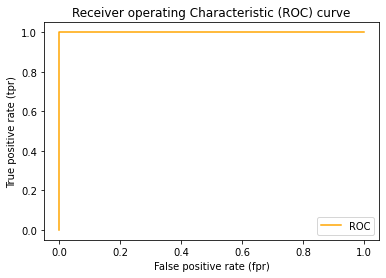

In [ ]:
#plot perfect ROC curve and AUC sore
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
#perfect Auc score 
roc_auc_score(y_test, y_test)
#video 28

1.0

**confusion matrix**

A confusion matrix is a quick way to compare the labels amodel predicts and the actual 
labels it was suppose to predict.
in essence, giving you an idea of where the model is getting confused


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [ ]:
##visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


In [ ]:
23 + 6 + 6 + 26

61

In [ ]:
len(x_test)

61

In [ ]:
#how to install a conda package from a jupyter notebook workspace
import sys
!conda install --yes --prefix {sys.prefix} seaborn


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




In [ ]:
# make our confusion matrix more visual with seaborn's heatmap()
import seasborn as sns

#set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat=confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat);


##video 30

ModuleNotFoundError: No module named 'seasborn'

In [ ]:
def plot_conf_mat(conf_mat):
    """
    plots a confusion matrix using seasborn's heatmap().
    """
    fig, ax =plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                    annot=True, #Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
    #fix the broken annotation( this happened in matplotlib3.1.1)
    bottom, top =ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top-0.5);


    
plot_conf_mat(conf_mat)

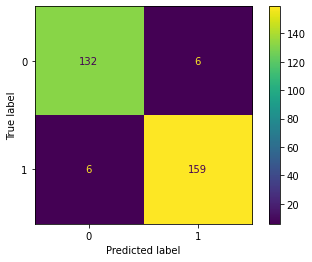

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x, y)

#shows you how your model is getting confused.
#the correct predicitions are going to be along the diagonal
#and the fasle negative and postiive will be in the other side

##Classififcation report

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
#where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]= 1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\JOHNKENNEDY\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JOHNKENNEDY\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JOHNKENNEDY\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


 ##Regression model evaluation metric
    
1. R^2 ( pronounced r-sqaure) or coefficient of determination
2 Mean absolute error (MAE)
3 Mean squared error (MSE)

**R^2**
what R-squared does: compares your models predictions to the mean of the target. values can range from negative infinity (a very poor model0 TO 1. FOR EXAMPLE IF ALL YOUR model does is predict the mean of the targets, its R^2 value would be 0. and if your model perfectly predicts a range of numbers its r^2 value would be 1.

In [ ]:
 from sklearn.ensemble import RandomForestRegressor
 

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

model= RandomForestRegressor()
model.fit(x_train, y_train);

In [ ]:
model.score(x_test, y_test)

0.8654448653350507

In [ ]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [ ]:
y_test.mean()

21.488235294117654

In [ ]:
r2_score(y_test, y_test_mean)

#zero

2.220446049250313e-16

In [ ]:
r2_score(y_test, y_test)

1.0

**Mean absolute errr(MAE)

In [ ]:
#mean absolute error
## the average of the absolute differences between predictions and actual value
#it gives you an idea of how wrong your models are
from sklearn.metrics import mean_absolute_error

y_preds= model.predict(x_test)
mae= mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [ ]:
df =pd.DataFrame(data={"actual values": y_test,
                      "predicted values": y_preds})
df["differences"]= df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


** Mean squared error
|

In [ ]:
#mean squared error 
#video 34
from sklearn.metrics import mean_squared_error


y_preds= model.predict(x_test)
mse= mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [ ]:
#calculate MSE by hand
squared= np.square(df["differences"])
squared.mean()

#minimie absolute eror minimie means squared error while maximizing R sqaured

9.867437068627439

In [ ]:
## finally using scoring parameter
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf= RandomForestClassifier(n_estimators=100)



In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
#cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x, y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [ ]:
#precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [ ]:
#Recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [ ]:
cv_f1 =cross_val_score(clf, x, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.841476533416832

how about our regression model


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x= boston_df.drop("target", axis=1)
y= boston_df["target"]

model= RandomForestRegressor(n_estimators=100)

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [ ]:
#Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-3.0312352552902335

In [ ]:
#Mean squared error 
np.random.seed(42)
cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.261442856882137

** from classification 
we have accuracy
precision
recall F1


from regression
r^square 
mean absolute error
mean squared error

In [ ]:
## using differnet evaluation metrics as scikit learn function


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instantiate Randomforestclassifier
clf = RandomForestClassifier()

#fit the model to the data  (training the machine learning model)
clf.fit(x_train,y_train)

#make some predicitons

y_preds = clf.predict(x_test)

#evaluate the classifier
print("classifier metrics on the test set")
print(f"Accuracy; {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")


classifier metrics on the test set
Accuracy; 85.25%
Precision: 0.8484848484848485
F1: 0.8615384615384615
Recall: 0.875


In [ ]:

## regression evaluation fnctions

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

#


#make predictions using regression model
y_preds = model.predict(x_test)


#evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2; {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")


Regression model metrics on the test set
R^2; 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


##Improving a model  
first predicitons = baseline predicitons
first model = baseline model

from a data perspective
* could we collect more data? (generally,  the more data, the better)
*could we improve or data

from a model perspective:
*is there a better model we could UserWarning
* could we improve the current model

Hyperparameters vs Parameters
Parameters = model find the paterns in data
Hyperparameters = setting on a model you can adjust to (potentially)
improve its ability ti find patterns


three ways to adjust Hyperparameters
1. By hand
2. RANDOMLY WITH RandomSearchCV
3. Exhaustively with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classf = RandomForestClassifier

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##Tunning hyperparameters by hand
lets make 3 sets,training, validation and test

we are going to try and adjust:
*max_depth
* max_features
*min samples leaf
*min samples train_test_split
*n_estimators

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaulation comparison on y_true labels 
    vs
    y_preds labels
     """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    metric_dict ={"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "f1": round(f1, 2),
                   "recall": round(recall, 2)
                   }
    print(f"Acc: {accuracy *100:.2f}%") 
    print(f"Precision: {precision:.2f}") 
    print(f"recall: {recall:.2f}")
    print(f"f1 score: {f1:.2f}")

    return metric_dict             


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#splitting into x and y
x =heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"]

#splitting the data into train, validation and test set
train_split= round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_spilt= round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
x_train, y_train= x[:train_split], y[:train_split] #x and y of train data
x_valid, y_valid= x[train_split:valid_spilt], y[train_split:valid_spilt]
#from train_split to valid_split of x and y
x_test, y_test= x[valid_spilt:], y[:valid_spilt] #valid split on words

#len(x_train), len(x_valid), len(x_test)

clf= RandomForestClassifier()
clf.fit(x_train, y_train)

#make  baseline predictions
y_preds = clf.predict(x_valid)

#evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
recall: 0.88
f1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'f1': 0.85, 'recall': 0.88}

In [ ]:
#create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

#make predicitions with different hyperparameters
y_preds_2= clf_2.predict(x_valid)

#evaluate the 2nd classifier
clf_2_metrics= evaluate_preds(y_valid, y_preds_2)

Acc: 84.44%
Precision: 0.85
recall: 0.88
f1 score: 0.86


In [ ]:
clf_3= RandomForestClassifier(n_estimators=100,
                               max_depth= 10)

### hyperparamter tunning with RandomizedSearchCV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid = {    "n_estimators": [10, 100, 200, 500, 1000, 1200],
            "max_depth": [None, 5, 10, 20, 30],
            "max_features": ["auto", "sqrt"],
            "min_samples_split": [2, 4, 6],
            "min_samples_leaf" : [1, 2, 4]}

np.random.seed(42)

#spliting into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"]

#split intotrain and test sets
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2)

##instantiate Randomforestclassifier
clf= RandomForestClassifier(n_jobs=1)

## setuup RandomizedsearchedCV
rs_clf = RandomizedSearchCV(estimator= clf,
                            param_distributions=grid,
                            n_iter=5, #number of models to try
                            cv=5,
                            verbose=2)
#fit the randomizedsearchCV version of clf
rs_clf.fit(x_train, y_train);


                                    
                                    
                                





Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200

In [ ]:
rs_clf.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=6,
                       n_jobs=1)

In [ ]:
#make predicitions with the best hyperparameters 
rs_y_preds = rs_clf.predict(x_test)

##Evaluate the predicitions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 80.33%
Precision: 0.75
recall: 0.86
f1 score: 0.80


## hyperparameter tunning with gridsearchCv


In [ ]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
grid_2 = {'n_estimators': [ 100, 200, 500],
        'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [ 6],
 'min_samples_leaf': [1, 2]}

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#spliting into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"]

#split intotrain and test sets
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2)

##instantiate Randomforestclassifier
classf= RandomForestClassifier(n_jobs=1)

## setuup GridsearchedCV
gs_clf =GridSearchCV(estimator= classf,
                            param_grid = grid_2,
                            cv=5,
                            verbose=2)
#fit the gridsearchCV version of clf
gs_clf.fit(x_train, y_train);


                                    
                                    
                                




Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [ ]:
gs_y_preds= gs_clf.predict(x_test)

#evaluate  the predicitons
gs_metrics = evaluate_preds(y_test, gs_y_preds)


Acc: 78.69%
Precision: 0.74
recall: 0.82
f1 score: 0.78


lets compare our different models metrics.  

<AxesSubplot:>

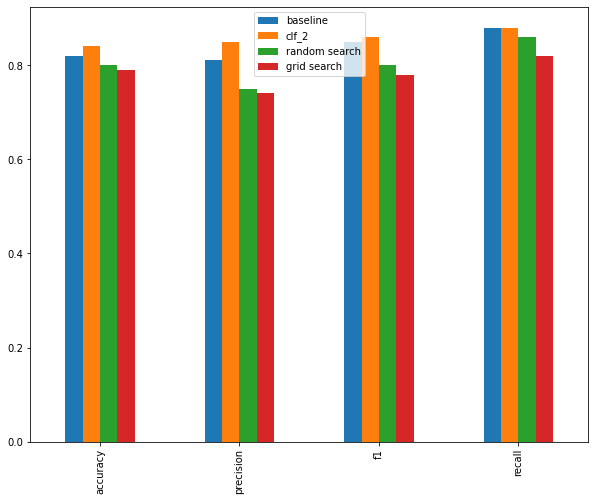

In [ ]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize= (10, 8))


#saving and loading trained mchine learning models
two ways to do it
1. with python's  "pickle" module
2. with the "joblib " module


In [ ]:
import pickle

#save an exisiting module to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

In [ ]:
#load  saved model
loaded_pickel_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [ ]:
#make some predicitions
pickle_y_preds = loaded_pickel_model.predict(x_test)

evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
recall: 0.82
f1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'f1': 0.78, 'recall': 0.82}

joblib

In [ ]:
from joblib import dump, load

#save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [ ]:
#import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [ ]:
#make and evaluate joblib predictions
joblib_y_preds= loaded_job_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
recall: 0.82
f1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'f1': 0.78, 'recall': 0.82}

## putting it all together
sklearn pipline

In [ ]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [ ]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64


steps we want to do in one cell:
1. fill missing data
2. convert data to numbers
3. build a model with the data

In [ ]:

#getting data ready 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


#setup random seed
import numpy as np
np.random.seed(42)


               


In [ ]:

#import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)


#define different features and transformer pipeline
categorical_features= ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])
    
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numerical_features = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[
                        ("imputer", SimpleImputer(strategy="mean"))
])
                       




In [ ]:

#creating a preprocessing and modelling pipeline
#model = Pipeline(steps=[(("preprocessor", preprocessor),
                #("model", RandomForestRegressor()))])
model = Pipeline(steps=[#("preprocessor", preprocessor),
                         ("model", RandomForestRegressor())])

In [ ]:
                
#setup preprocessing steps(fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                transformers=[
                ("cat", categorical_transformer, categorial_features),
                ("door", door_transformer, door_feature),
                ("num", numerical_transformer, numerical_features)
                ])


In [ ]:


#split data 
x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:

#fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Honda'